In [15]:
pip install yahoo_fin


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from pandas_datareader import data
import yfinance as yf
from statsmodels.tools.eval_measures import rmse

In [29]:
#df = data.DataReader('BTC-USD', end_date)
bit=yf.download('BTC-USD')
close=bit['Close']
adfuller(close)


[*********************100%***********************]  1 of 1 completed


(-1.6650926249445492,
 0.4491815580521214,
 28,
 2883,
 {'1%': -3.432620250421088,
  '5%': -2.8625430431586545,
  '10%': -2.567303948779845},
 46704.57367721377)

In [9]:
seasonal=sm.tsa.seasonal_decompose(close)

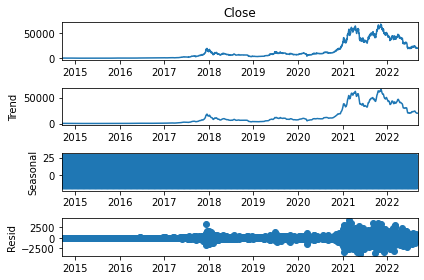

In [10]:
seasonal.plot();

In [11]:
adfuller(close)
#print("not stationary")

(-1.6657740659731766,
 0.448827334681972,
 28,
 2883,
 {'1%': -3.432620250421088,
  '5%': -2.8625430431586545,
  '10%': -2.567303948779845},
 46704.55270309886)

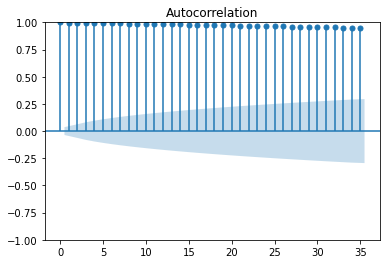

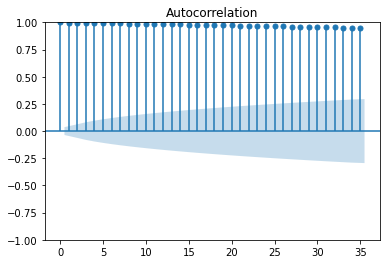

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(close)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


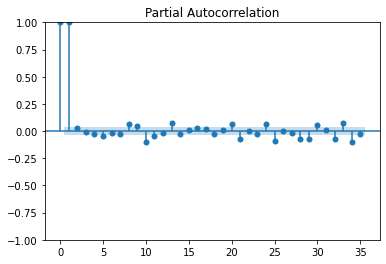

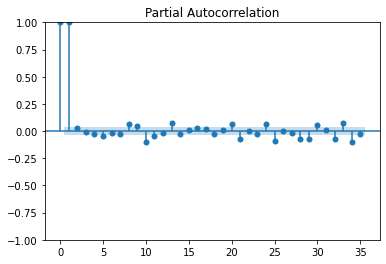

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(close)

In [34]:
model=auto_arima(close)
model

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -23522.977
Date:                Tue, 06 Sep 2022   AIC                          47049.954
Time:                        09:16:49   BIC                          47061.900
Sample:                    09-17-2014   HQIC                         47054.258
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0257      0.010     -2.653      0.008      -0.045      -0.007
sigma2      6.467e+05   5541.075    116.708      0.000    6.36e+05    6.58e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

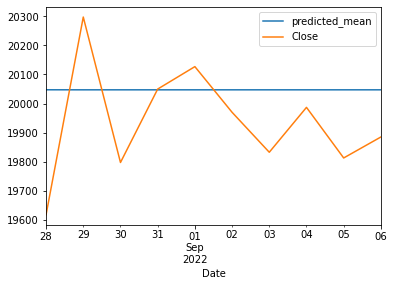

In [14]:
#AR 1
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(1,1,0))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
rmse(test,pred)
print(rmse)

In [39]:
ar1=rmse(test,pred)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                ARIMA(30, 1, 0)   Log Likelihood              -23456.180
Date:                Tue, 06 Sep 2022   AIC                          46974.360
Time:                        09:21:27   BIC                          47159.517
Sample:                    09-17-2014   HQIC                         47041.074
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0182      0.010     -1.779      0.075      -0.038       0.002
ar.L2          0.0120      0.010      1.204      0.229      -0.008       0.032
ar.L3          0.0265      0.011      2.494      0.0

262.9328172151441

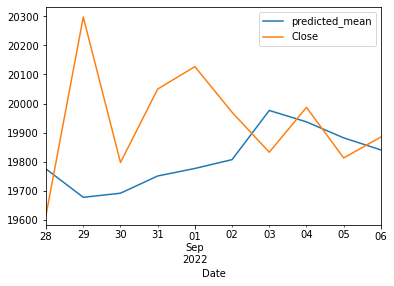

In [25]:
#AR 2
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(30,1,0))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
rmse(test,pred)

In [41]:
ar2=rmse(test,pred)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -23522.409
Date:                Tue, 06 Sep 2022   AIC                          47052.819
Time:                        09:17:00   BIC                          47076.710
Sample:                    09-17-2014   HQIC                         47061.427
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0256      0.010     -2.651      0.008      -0.045      -0.007
ar.L2          0.0048      0.009      0.526      0.599      -0.013       0.023
ar.L3          0.0193      0.010      1.955      0.0

203.93999270057188

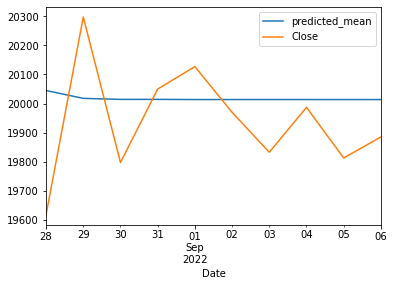

In [16]:
#AR 3
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(3,1,0))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
rmse(test,pred)

In [43]:
ar3=rmse(test,pred)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -23522.988
Date:                Tue, 06 Sep 2022   AIC                          47049.977
Time:                        09:17:08   BIC                          47061.922
Sample:                    09-17-2014   HQIC                         47054.281
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0254      0.010     -2.618      0.009      -0.044      -0.006
sigma2      6.474e+05   5551.182    116.616      0.000    6.36e+05    6.58e+05
Ljung-Box (L1) (Q):                   0.00   Jarque-

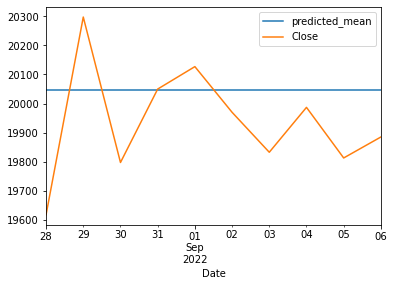

In [17]:
#MA 1
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(0,1,1))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
ma1=rmse(test,pred)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -23522.943
Date:                Tue, 06 Sep 2022   AIC                          47051.885
Time:                        09:22:10   BIC                          47069.804
Sample:                    09-17-2014   HQIC                         47058.341
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0258      0.010     -2.654      0.008      -0.045      -0.007
ma.L2          0.0057      0.009      0.620      0.536      -0.012       0.024
sigma2      6.482e+05   5644.519    114.837      0.0

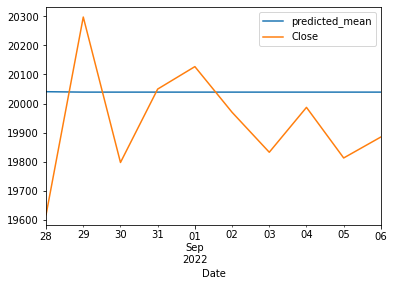

In [26]:
#MA 2
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(0,1,2))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
ma2=rmse(test,pred)

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(0, 1, 3)   Log Likelihood              -23522.346
Date:                Tue, 06 Sep 2022   AIC                          47052.691
Time:                        09:17:15   BIC                          47076.583
Sample:                    09-17-2014   HQIC                         47061.300
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0271      0.010     -2.819      0.005      -0.046      -0.008
ma.L2          0.0046      0.009      0.491      0.624      -0.014       0.023
ma.L3          0.0201      0.010      2.009      0.0

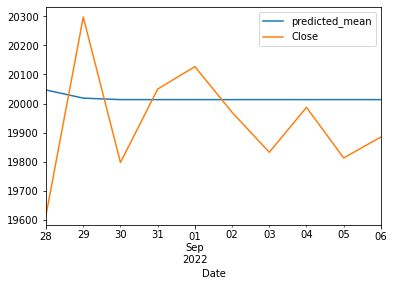

In [18]:
#MA 3
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(0,1,3))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
ma3=rmse(test,pred)

In [30]:
model = auto_arima(train, start_p=0, start_q=0,
                          max_p=4, max_q=4,m=12,start_P=0,start_Q=0,
                          max_P = 4, max_Q = 4,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=49048.873, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=47945.341, Time=5.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=49045.769, Time=0.38 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=47698.488, Time=11.38 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=47451.415, Time=40.02 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=47396.973, Time=62.97 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=156.60 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=89.26 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=47395.981, Time=13.69 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=47450.286, Time=8.48 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=inf, Time=126.54 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=71.01 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=47396.973, Time=73.25 sec
 ARIMA(1,1,1)(4,1,0)[12]

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -23523.933
Date:                Tue, 06 Sep 2022   AIC                          47049.867
Time:                        09:19:52   BIC                          47055.840
Sample:                    09-17-2014   HQIC                         47052.019
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.467e+05   5535.013    116.832      0.000    6.36e+05    6.58e+05
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):             34210.71
Prob(Q):                              0.17   Pr

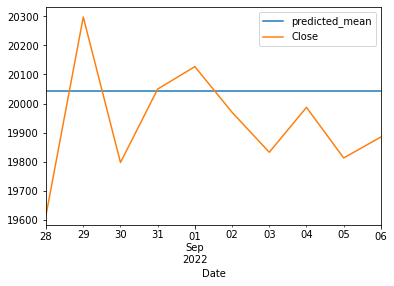

In [20]:
#MA 3
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(0,1,0))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
pred.plot(legend=True)
test.plot(legend=True)
arima_0_1_0=rmse(test,pred)

In [21]:
d=model_fit.forecast(5)
d

2022-08-28    20041.738281
2022-08-29    20041.738281
2022-08-30    20041.738281
2022-08-31    20041.738281
2022-09-01    20041.738281
Freq: D, Name: predicted_mean, dtype: float64

In [22]:
arima_0_1_0

210.4819117170516

In [23]:
ar1

NameError: name 'ar1' is not defined

In [ ]:
ar2

In [ ]:
ar3

C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kareem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2902
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23520.581
Date:                Tue, 06 Sep 2022   AIC                          47051.163
Time:                        10:03:42   BIC                          47081.027
Sample:                    09-17-2014   HQIC                         47061.923
                         - 08-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0263      0.010     -2.699      0.007      -0.045      -0.007
ar.L2          0.0047      0.009      0.503      0.615      -0.014       0.023
ar.L3          0.0202      0.010      2.033      0.0

<AxesSubplot:xlabel='Date'>

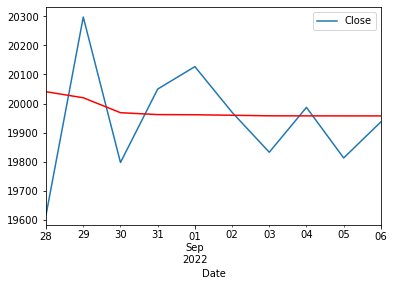

In [31]:
length_close=len(close)
train=close[0:-10]
test=close[-10:]
mod=sm.tsa.arima.ARIMA(train, order=(4,1,0))
model_fit = mod.fit()
print(model_fit.summary())
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,typ='levels')
pred.index=close.index[start:end+1]
#pred.plot(legend=True)
test.plot(legend=True)
rmse(test,pred)
print(rmse)
model_fit.forecast(end-start+1).plot(color='r')


ConversionError: Failed to convert value(s) to axis units: '2021'

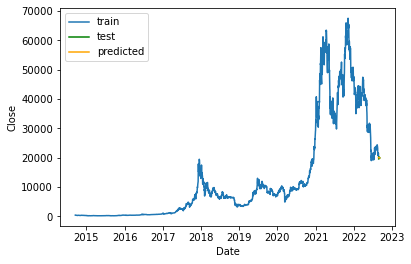

In [32]:
sns.lineplot(x=bit.index[:-10],y=train,label='train')
sns.lineplot(x=bit.index[-10:],y=test,color='green',label='test')
sns.lineplot(x=bit.index[-10:],y=pred,color='orange',label='predicted')
plt.xlim('2021','2022')

In [ ]:
bit.index[-10:]

In [ ]:
bit.index[2021:]

In [ ]:
sns.lineplot(x=bit.index,y=bit['Close'])

In [105]:
bit['01-2022':].index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03',
               '2022-09-04', '2022-09-05'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)